# Introduccion

En este problema tenemos como objetivo programar una funcion que use el metodo Boostrap, el cual nos permite estimar la varianza a partir de un conjunto de variables aleatorias. El metodo es sensillo, tenemos una lista de N variables, y con ella calculamos un cierto estimador. Ahora nosotros queremos estimarle una varianza de ese estimador y para ello tomamos una lista de n elementos elegiendo (se pueden repetir) de manera aleatorias elementos de la lista original y calcularle el mismo estimador. A partir de esto, tendremos N estimadores de este remuestreo. Con ello se logra conseguir una estimacion de la varianza de este estimador. 
Para ello, se introduce entonces una funcion que se come una lista de N variables, una funcion que calcula un cierto estimador (la media por ejemplo) y se hacen M remuestreos.Esta devuelve una lista de M estimadores y con ella se calcula la varianza. Posterior a esto, se hace una demostracion a partir de una lista de numeros con distribucion uniforme en el intervalo (0,1) cuya media teorica es 0.5. Se usa el estimador de la media y se le asigna la desviacion dada por la funcion Boostrap. Se muestras los valores obtenidos despues de (100 remuestreos y se da el estimador con la desviacion dada por la funcion boostrap)

In [1]:
def Boostrap(lista,g,M,alpha):
    import numpy as np
    n=len(lista)
    estimador=[]
    for j in range(M):
        lista2=[]
        for i in range(n):
            x=np.random.choice(n)
            lista2.append(lista[x])
        estimador.append(g(lista2))
    #---------------------------- desv estad------------------------
    media=0
    for i in range(M):
        media=estimador[i]+media
    media=media/M
    
    desv=0
    for i in range(M):
        desv=(estimador[i]-media)**2+desv 
    desv=((desv/(M-1)**0.5))
    #---------------------------interv confia-----------------
    estimador.sort()
    S=0
    #busco la posicion de la mediana, o su intervalo
    porc=1-0.01*alpha
    #tomo el valor menor a alpha sobre dos
    from math import floor
    VAL=floor(M*0.5*porc)
    bot=estimador[VAL]
    up=estimador[M-VAL-1]
    
    print('')
    print('El intervalo de confianza es (' ,bot ,',',up ,')','para un nivel de confianza del ',alpha,'%');  
    
    return(estimador,desv)  


### Ejemplo:

In [2]:
def g(lista):
    N=len(lista)
    lista=list(lista)
    media=0
    for i in range(len(lista)):
        media=lista[i]+media
    media=media/N
    return(media)


El intervalo de confianza es ( 0.463380590812927 , 0.5186601952476642 ) para un nivel de confianza del  100 %

el valor medio es ( 0.48953183761899616 ± 0.0026428678593399006 )



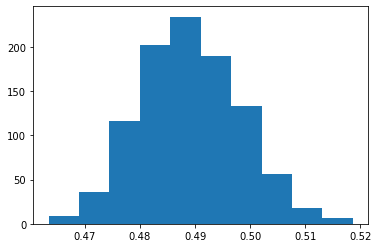

In [3]:
import numpy as np
lista=np.random.random(1000)
med=g(lista)
M=1000
L,sigma=Boostrap(lista,g,M,100)
import matplotlib.pyplot as plt
plt.hist(L);

print('')
print ('el valor medio es (', med , '±', sigma, ')');
print('')


In [4]:
min(L),max(L)

(0.463380590812927, 0.5186601952476642)

# Conclusion

Este metodo sirve para estimar la desviacion de un estimador dada una muestra y es interesante porque nos permite una forma simple de resolver la asignacion de un error al no estar tan claro estadisticamente que error asignar. Ademas esta funcion estima un intervalo de confianza si la distribucion es desconocida. En el ejemplo se eligio el caso extremo para ver si respondia bien la funcion, dando el intervalo total. Como se puede evidenciar debajo, este intervalo es correcto. luego se hace para el caso de $\alpha = 66$ % 